Finding the overlaps of an impulse train.

In [30]:
%matplotlib inline

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import smart_loop_test

In [31]:
dx = [5.0,4.0,10.0,20.0,30.0,20.0,5.0,4.0,10.0,20.0,30.0,20.0,5.0,4.0]
x = np.cumsum(dx)
x

array([  5.,   9.,  19.,  39.,  69.,  89.,  94.,  98., 108., 128., 158.,
       178., 183., 187.])

In [32]:
d = np.diff(x)
d

array([ 4., 10., 20., 30., 20.,  5.,  4., 10., 20., 30., 20.,  5.,  4.])

In [33]:
n =  np.array(range(1,len(x)))
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

k: 0
shift: 4.0, total: 4.0
[ 4. 10. 20. 30. 20.  5.  4. 10. 20. 30. 20.  5.  4.]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
k: 5
shift: 1.0, total: 5.0
[10.  6. 16. 26. 16.  1. 10.  6. 16. 26. 16.  1. inf]
[ 2  2  3  4  5  6  8  8  9 10 11 12 13]
k: 5
shift: 4.0, total: 9.0
[ 9.  5. 15. 25. 15.  4.  9.  5. 15. 25. 15.  4. inf]
[ 2  2  3  4  5  7  8  8  9 10 11 13 13]
k: 1
shift: 1.0, total: 10.0
[ 5.  1. 11. 21. 11. 10.  5.  1. 11. 21. 11. inf inf]
[ 2  2  3  4  5  8  8  8  9 10 11 13 13]
k: 0
shift: 4.0, total: 14.0
[ 4. 20. 10. 20. 10.  9.  4. 20. 10. 20. 10. inf inf]
[ 2  3  3  4  5  8  8  9  9 10 11 13 13]
k: 5
shift: 5.0, total: 19.0
[20. 16.  6. 16.  6.  5. 20. 16.  6. 16.  6. inf inf]
[ 3  3  3  4  5  8  9  9  9 10 11 13 13]
k: 2
shift: 1.0, total: 20.0
[15. 11.  1. 11.  1. 20. 15. 11.  1. 11.  1. inf inf]
[ 3  3  3  4  5  9  9  9  9 10 11 13 13]
k: 4
shift: 5.0, total: 25.0
[14. 10. 30. 10.  5. 19. 14. 10. 30. 10.  5. inf inf]
[ 3  3  4  4  6  9  9  9 10 10 12 13 13]
k: 4
shift:

C:\Users\nathanm\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


k: 1
shift: 1.0, total: 80.0
[ 5.  1. 10. 10. 10. 10.  5.  1. inf inf inf inf inf]
[ 5  5  8  9 10 11 11 11 13 13 13 13 13]
k: 0
shift: 4.0, total: 84.0
[ 4.  5.  9.  9.  9.  9.  4.  5. inf inf inf inf inf]
[ 5  6  8  9 10 11 11 12 13 13 13 13 13]
k: 1
shift: 1.0, total: 85.0
[ 5.  1.  5.  5.  5.  5.  5.  1. inf inf inf inf inf]
[ 6  6  8  9 10 11 12 12 13 13 13 13 13]
k: 0
shift: 4.0, total: 89.0
[ 4.  4.  4.  4.  4.  4.  4.  4. inf inf inf inf inf]
[ 6  7  8  9 10 11 12 13 13 13 13 13 13]
k: 0
shift: 4.0, total: 93.0
[ 4. 10. 20. 30. 20.  5.  4. inf inf inf inf inf inf]
[ 7  8  9 10 11 12 13 13 13 13 13 13 13]
k: 5
shift: 1.0, total: 94.0
[10.  6. 16. 26. 16.  1. inf inf inf inf inf inf inf]
[ 8  8  9 10 11 12 13 13 13 13 13 13 13]
k: 5
shift: 4.0, total: 98.0
[ 9.  5. 15. 25. 15.  4. inf inf inf inf inf inf inf]
[ 8  8  9 10 11 13 13 13 13 13 13 13 13]
k: 1
shift: 1.0, total: 99.0
[ 5.  1. 11. 21. 11. inf inf inf inf inf inf inf inf]
[ 8  8  9 10 11 14 13 13 13 13 13 13 13]
k: 0
shi

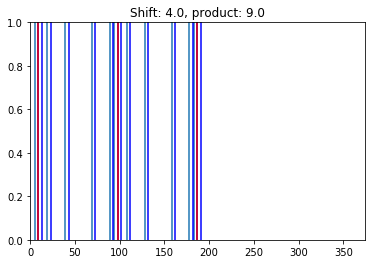

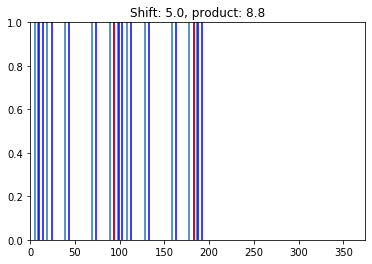

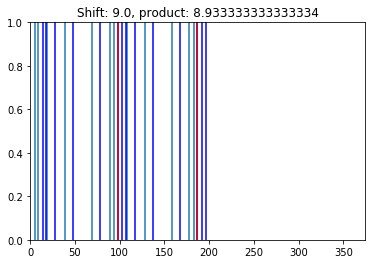

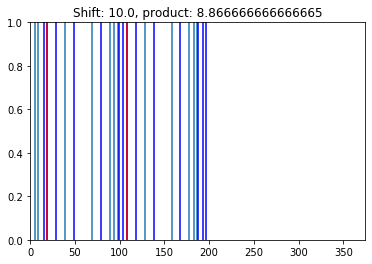

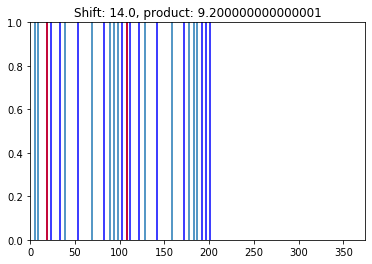

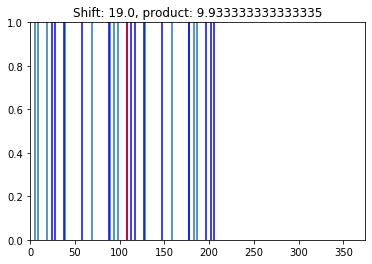

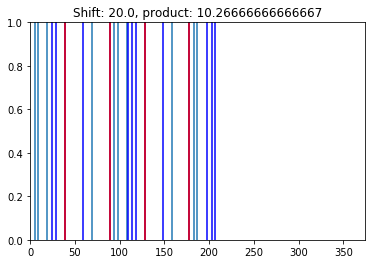

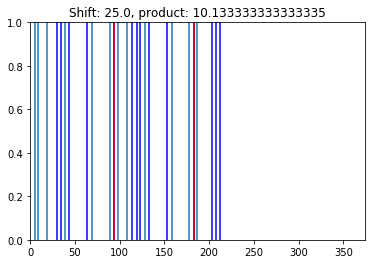

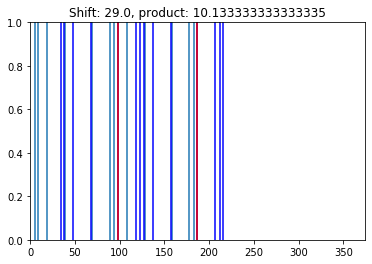

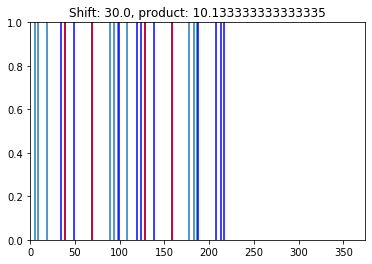

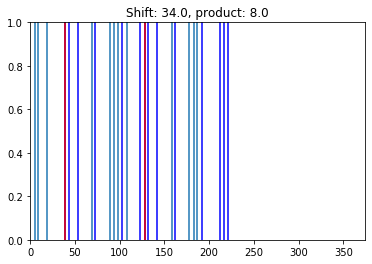

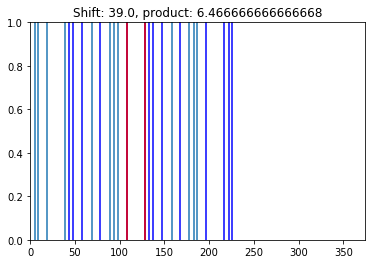

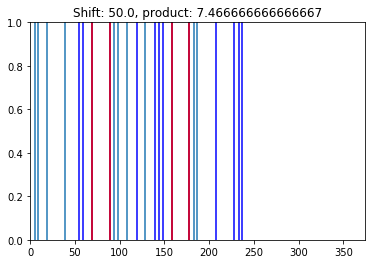

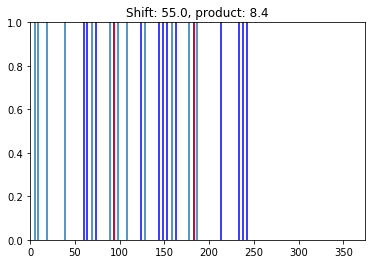

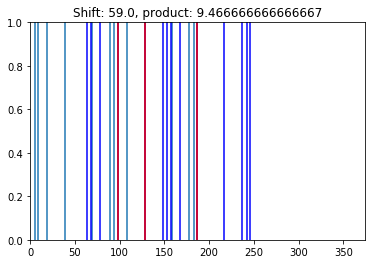

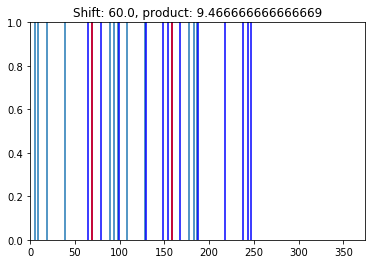

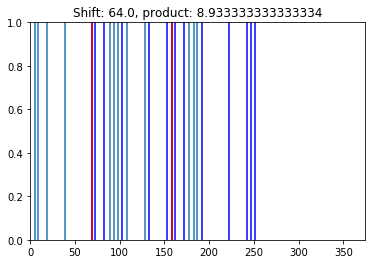

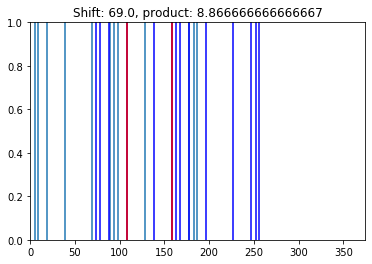

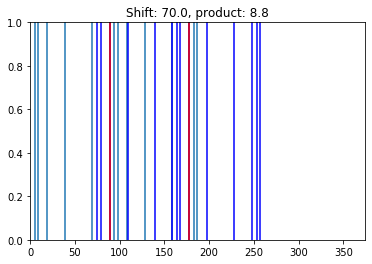

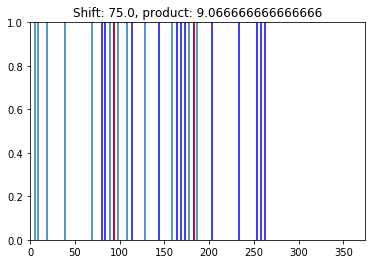

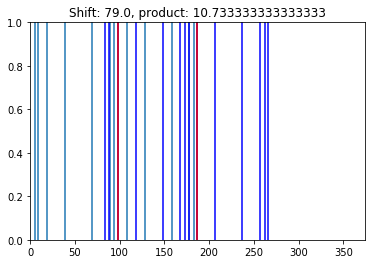

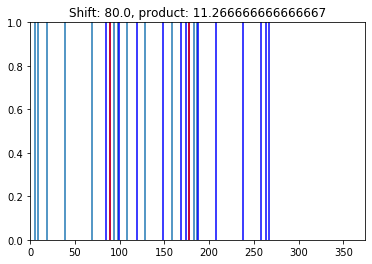

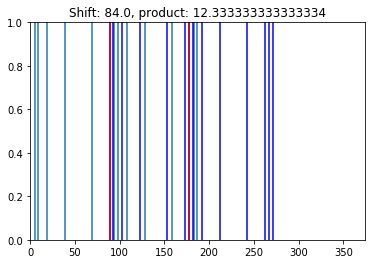

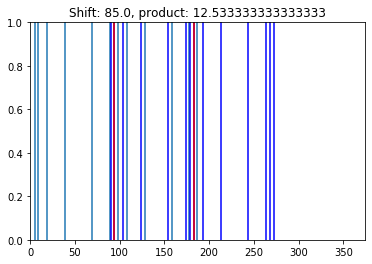

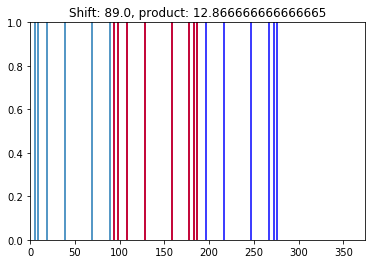

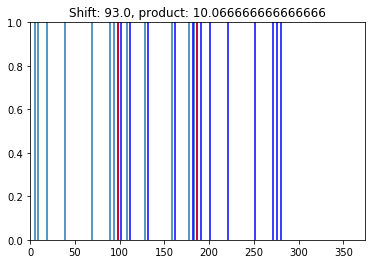

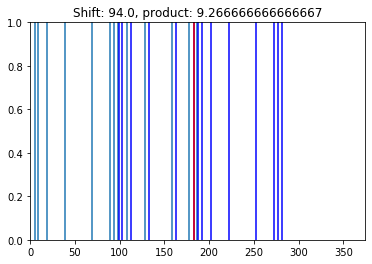

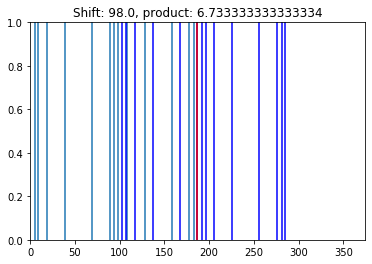

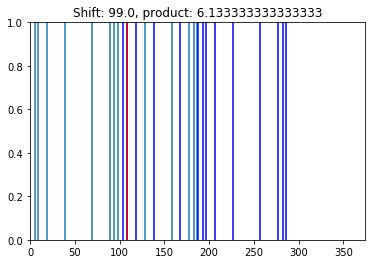

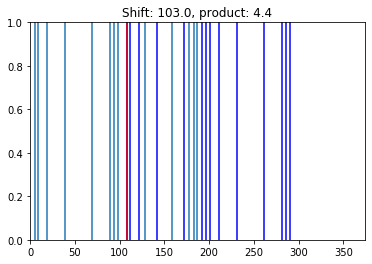

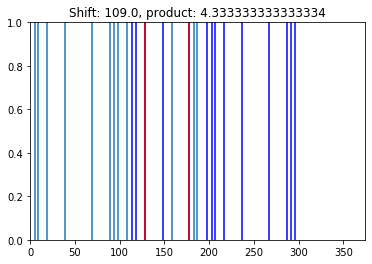

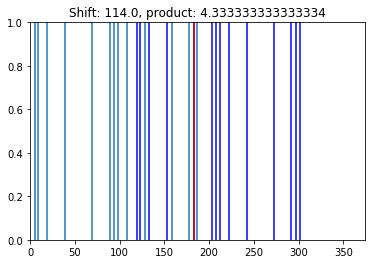

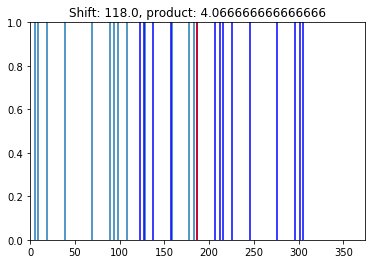

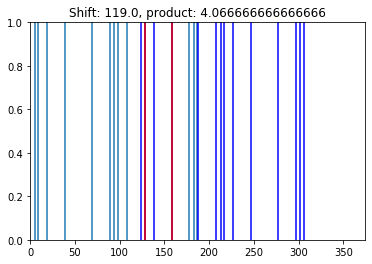

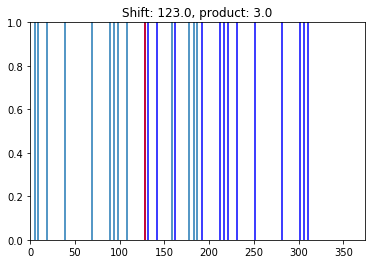

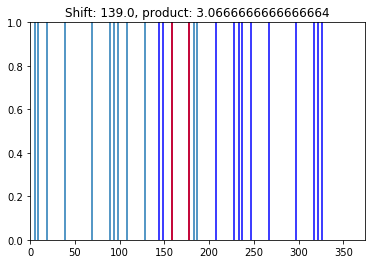

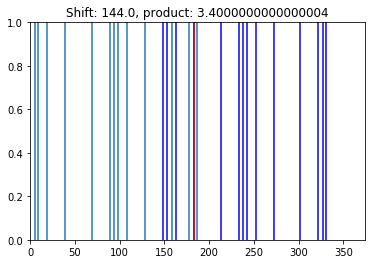

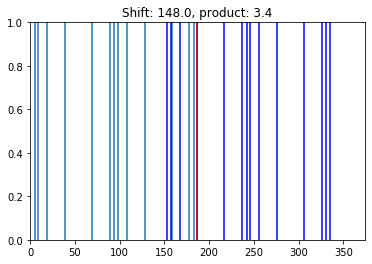

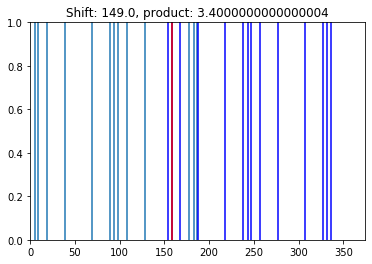

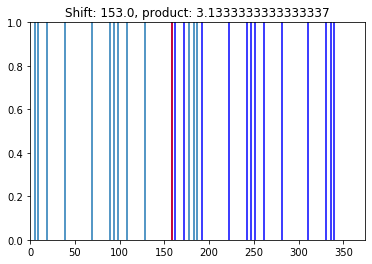

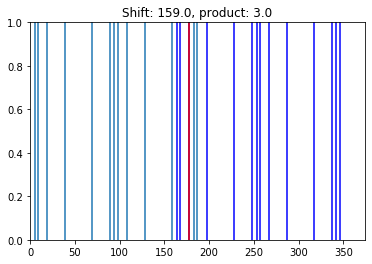

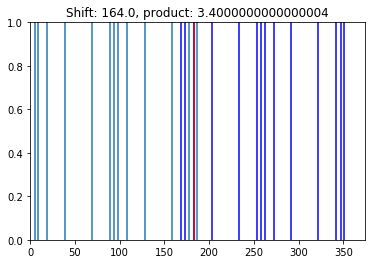

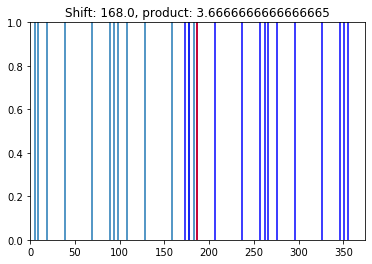

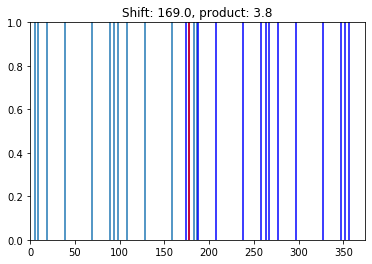

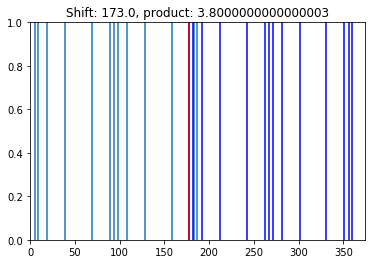

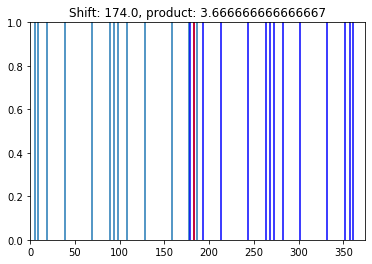

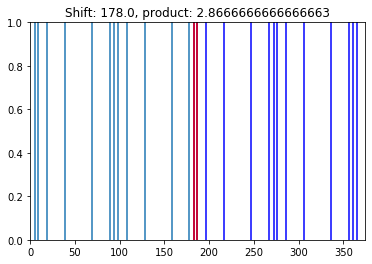

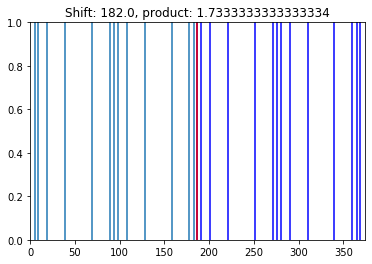

In [34]:

total_shift = 0

shifts = []
shift_products = []

while(n[0] < len(x)):
    k = np.argmin(d)
    shift = d[k]
    total_shift = total_shift + shift
    shifts.append(total_shift)
    
    shift_products.append(smart_loop_test.self_product_shift(x, total_shift, 30))
    
    f = plt.figure()
    
    plt.title("Shift: {}, product: {}".format(total_shift, shift_products[-1]))
    [plt.axvline(x=xv) for xv in x]
    [plt.axvline(x=xv, color='b') for xv in x + total_shift]
    plt.axvline(x[n[k]], color='r')
    plt.xlim(0, x[-1]*2)
    
    print("k: {}".format(k))
    print("shift: {}, total: {}".format(shift, total_shift))
    print(d)
    print(n)
    
    
    
    if(n[k] >= len(x) - 1):
        d[k] = np.inf
        n[k] = len(x)
    else:
        d[k] = x[n[k] + 1] - x[n[k]]
        n[k] = n[k] + 1
    for l in range(len(d)):
        if(l==k):
            continue

        # Don't bother shifting 
        if(n[l] > len(x) - 1):
            continue
        d[l] = d[l] - shift
        assert(d[l] >= 0)

        if(d[l] == 0):
            plt.axvline(x[n[l]], color='r')
            if(n[l] >= len(x) - 1):
                d[l] = np.inf
                n[l] == len(x)
            else:
                d[l] = x[n[l] + 1] - x[n[l]]
                n[l] = n[l] + 1

In [35]:
d

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [36]:
n

array([14, 13, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13])

In [37]:
shift

4.0